In [2]:
import numpy as np # linear algebra
import pandas as pd
import os
import json
import re, string
import sys
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import optimize

In [3]:
def init_ds(json):
    ds= {}
    keys = json.keys()
    for k in keys:
        ds[k]= []
    return ds, keys

def read_json(file):
    dataset = {}
    keys = []
    with open(file) as file_lines:
        for count, line in enumerate(file_lines):
            data = json.loads(line.strip())
            if count ==0:
                dataset, keys = init_ds(data)
            for k in keys:
                dataset[k].append(data[k])
                
        return pd.DataFrame(dataset)

In [5]:
yelp_review = read_json("/kaggle/input/yelp-dataset/yelp_academic_dataset_review.json")
# yelp_review["date"] = pd.to_datetime(yelp_review["date"], format = "%Y-%m-%d")

In [47]:
def tokenize(s):
    """Convert string to lowercase and split into words (ignoring
    punctuation), returning list of words.
    """
    word_list = re.findall(r'\w+', s.lower())
    filtered_words = [word for word in word_list]
    return filtered_words

## k-means

In [130]:
doc = yelp_review.text[0:300]
review_length = []
for line in doc:
    words = tokenize(line)
#     print(words)
    review_length.append(len(words))
print(len(review_length))

300


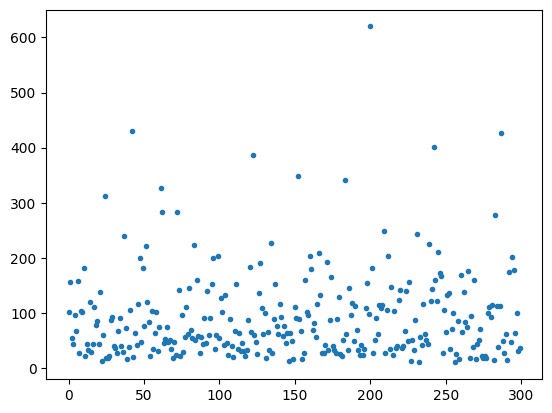

In [131]:
x = np.arange(len(review_length))
y = review_length
# plt.scatter(x, y)
plt.plot(x,y, ".")

In [137]:
points = np.column_stack((x,y))

In [138]:
def distance(p1,p2):
    return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

distance(points[0], points[2])

47.042533945356304

In [139]:
def k_means_cluster(points, k):
    # Choose cluster centers randomly
    centers = np.random.rand(k, 2) * 100
    print(centers)


    # Repeat until convergence
    while True:
        # Assign points to clusters based on minimum distance
        clusters = [[] for _ in range(3)]
        
        for point in points:
            distances = distance(centers, point)
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)

        # Update cluster centers
        new_centers = np.zeros_like(centers)
        for i, cluster in enumerate(clusters):
            if cluster:
                new_centers[i] = np.median(cluster, axis=0)
            else:
                new_centers[i] = centers[i]

        # Check for convergence
        if np.allclose(centers, new_centers):
            break

        centers = new_centers
    return centers

[[81.07801757 17.67078233]
 [60.7024512  53.4354051 ]
 [69.5836917  30.06759423]]


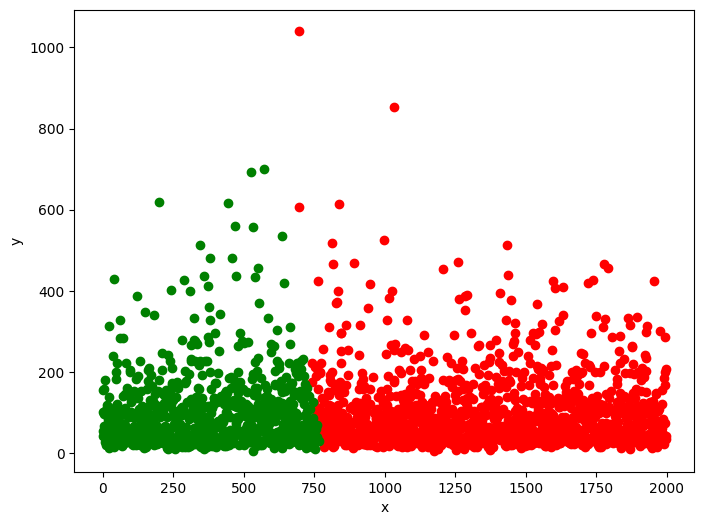

In [143]:
k_means_cluster(points, 3)

# Plot the clusters
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
    color = colors[i]
    xs = [p[0] for p in cluster]
    ys = [p[1] for p in cluster]
    plt.scatter(xs, ys, c=color)
plt.xlabel('x')
plt.ylabel('y')
plt.show()